In [1]:
%%capture
%matplotlib notebook
#from matplotlib.widgets import Slider
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create and plot function
cr_default = 30
dmg_buff = np.arange(0, 100, 1)

def cal_avg_cdmg_mul_break(cr):
    return (1 + (dmg_buff+20)/100.0) * (1.3 * cr/100.0 + 1 - cr/100.0)

def cal_avg_cdmg_mul_lion(cr):
    cr_lion = np.minimum(cr+50, 100)
    return (1 + (dmg_buff-20)/100.0) * (1.6 * cr_lion/100.0 + 1 - cr_lion/100.0)

def cal_avg_cdmg_mul_lion_break(cr):
    cr_lion = np.minimum(cr+50, 100)
    return (1 + dmg_buff/100.0) * (1.3 * cr_lion/100.0 + 1 - cr_lion/100.0)

def find_intersection_points(f, g):
    return np.argwhere(np.diff(np.sign(f - g))).flatten()

avg_cdmg_mul_break = cal_avg_cdmg_mul_break(cr_default)
avg_cdmg_mul_lion = cal_avg_cdmg_mul_lion(cr_default)
avg_cdmg_mul_lion_break = cal_avg_cdmg_mul_lion_break(cr_default)
idx = find_intersection_points(avg_cdmg_mul_break, avg_cdmg_mul_lion)

<IPython.core.display.Javascript object>


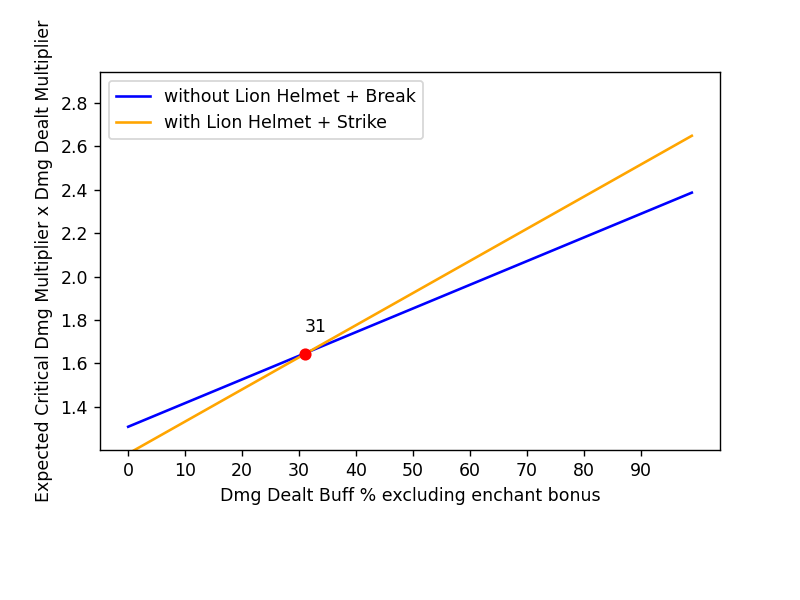

interactive(children=(IntSlider(value=30, description='Crit Rate % without helmet:'), Output()), _dom_classes=…

<function __main__.update(cr=30)>

In [4]:
# Create subplot
fig = plt.figure()
plt.subplots_adjust(bottom=0.25)
ax = fig.subplots()

p_break, = ax.plot(dmg_buff, avg_cdmg_mul_break, color='blue')
p_lion, = ax.plot(dmg_buff, avg_cdmg_mul_lion, color='orange')
#p_lion_break, = ax.plot(dmg_buff, avg_cdmg_mul_lion_break, color='green')
p_intersect, = ax.plot(dmg_buff[idx], avg_cdmg_mul_lion[idx], 'ro')
text_intersect = plt.text(dmg_buff[idx][0], avg_cdmg_mul_lion[idx][0]+0.1, '{}'.format(dmg_buff[idx][0]))

plt.legend(["without Lion Helmet + Break", "with Lion Helmet + Strike"])
#plt.legend(["without Lion Helmet + Break", "with Lion Helmet + Strike", "with Lion Helmet + Break"])

ax.set_xlabel("Dmg Dealt Buff % excluding enchant bonus")
ax.set_ylabel("Expected Critical Dmg Multiplier x Dmg Dealt Multiplier")
ax.set_xticks(np.arange(0, 100, 10))

# Create axes for slider
#ax_cr=plt.axes([.25,.1,.65,.03])

# Create a slider
#s_cr = Slider(ax_cr, 'Crit Rate %', valmin=0,valmax=100,valinit=cr_default,valstep=1)

# Create function to be called when slider value is changed
def update(cr = cr_default):
    #cr = s_cr.val
    avg_cdmg_mul_break = cal_avg_cdmg_mul_break(cr)
    avg_cdmg_mul_lion = cal_avg_cdmg_mul_lion(cr)
    avg_cdmg_mul_lion_break = cal_avg_cdmg_mul_lion_break(cr)
    idx = find_intersection_points(avg_cdmg_mul_break, avg_cdmg_mul_lion)
    
    p_break.set_ydata(avg_cdmg_mul_break)
    p_lion.set_ydata(avg_cdmg_mul_lion)
    #p_lion_break.set_ydata(avg_cdmg_mul_lion_break)
    p_intersect.set_data(dmg_buff[idx], avg_cdmg_mul_lion[idx])
    text_intersect.set_position((dmg_buff[idx][0], avg_cdmg_mul_lion[idx][0]+0.1))
    text_intersect.set_text('{}'.format(dmg_buff[idx][0]))
    
    fig.canvas.draw_idle()

#s_cr.on_changed(update)
interact(update, cr = widgets.IntSlider(description='Crit Rate % without helmet:', value=cr_default, min=0, max=100, step=1))

<IPython.core.display.Javascript object>


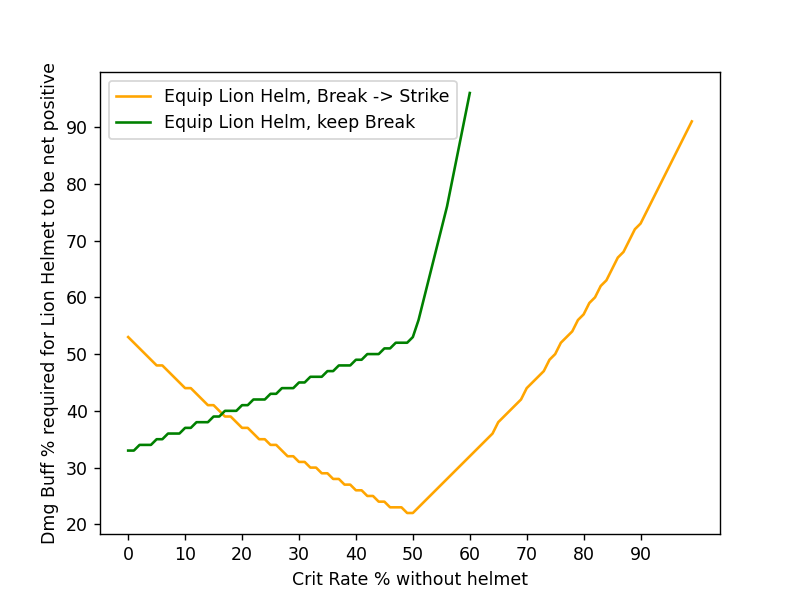

([<matplotlib.axis.XTick at 0x214546f5988>,
 <a list of 10 Text major ticklabel objects>)

In [3]:
cr_range = np.arange(0, 100, 1)
dmg_buff_required_strike = []
for cr in cr_range:
    avg_cdmg_mul_break = cal_avg_cdmg_mul_break(cr)
    avg_cdmg_mul_lion = cal_avg_cdmg_mul_lion(cr)
    idx_strike = find_intersection_points(avg_cdmg_mul_break, avg_cdmg_mul_lion)
    dmg_buff_required_strike.append(dmg_buff[idx_strike][0])
dmg_buff_required_strike = np.array(dmg_buff_required_strike)
plt.plot(cr_range, dmg_buff_required_strike, color='orange')

dmg_buff_required_break = []
for cr in cr_range:
    avg_cdmg_mul_break = cal_avg_cdmg_mul_break(cr)
    avg_cdmg_mul_lion_break = cal_avg_cdmg_mul_lion_break(cr)
    idx_break = find_intersection_points(avg_cdmg_mul_break, avg_cdmg_mul_lion_break)
    if len(dmg_buff[idx_break]) == 0:
        break
    dmg_buff_required_break.append(dmg_buff[idx_break][0])
dmg_buff_required_break = np.array(dmg_buff_required_break)
plt.plot(cr_range[:len(dmg_buff_required_break)], dmg_buff_required_break, color='green')

plt.legend(["Equip Lion Helm, Break -> Strike", "Equip Lion Helm, keep Break"])
plt.xlabel("Crit Rate % without helmet")
plt.ylabel("Dmg Buff % required for Lion Helmet to be net positive")
plt.xticks(np.arange(0, 100, 10))